<a href="https://colab.research.google.com/github/emiliomercuri/hidrologia/blob/main/notebooks/__2023_Exemplo_2_(aula)_Hidrograma_Unit%C3%A1rio_nota%C3%A7%C3%A3o_matricial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cálculo da Hidrograma Unitário - notação matricial

Os dados são obtidos em intervalos de tempo de meia hora:

| Tempo (0.5 h) | Precipitação Efetiva (mm) | Escoamento Direto (m$^3$/s) |
| :---: | :---: | :---: |
| 1 | 1.06 | 428 |
| 2 | 1.93 | 1923 |
| 3 | 1.81 | 5297 |
| 4 |  | 9131 |
| 5 |  | 10625 |
| 6 |  | 7834 |
| 7 |  | 3921 |
| 8 |  | 1846 |
| 9 |  | 1402 |
| 10 |  | 830 |
| 11 |  | 313 |

In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
#np.linalg.solve?

In [ ]:
# Dados:
precipitation = np.array([1.06,1.93,1.81])
index_prec = np.arange(len(precipitation))
Q = [428,1923,5297,9131,10625,7834,3921,1846,1402,830,313]

<Figure size 1500x800 with 0 Axes>

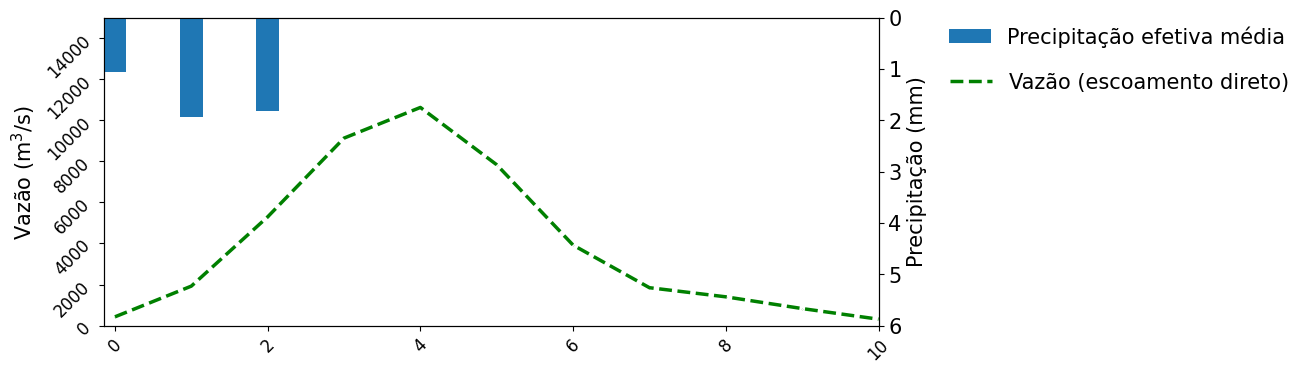

In [ ]:
plt.figure(figsize=(15,8))
plt.gcf().autofmt_xdate()

fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(Q,color='green', marker='o', linestyle='dashed',linewidth=2.5, markersize=0.1, label = 'Vazão (escoamento direto)')
ax1.set_ylim(0,15000)
ax1.margins(0.0)
ax1.tick_params(axis='both', labelsize=12,rotation=45) #increase font size for ticks
ax1.set_ylabel(r'Vazão (m$^3$/s)', fontsize=15) #y label

ax1.legend(bbox_to_anchor=(1.54, 0.85), borderaxespad=0.,frameon=False, fontsize=15)

ax2 = ax1.twinx()
ax2.margins(0.0)
ax2.bar(index_prec,precipitation, width=0.3, label = 'Precipitação efetiva média')

ax2.tick_params(axis='both', labelsize=15)
ax2.set_ylabel('Precipitação (mm)', fontsize=15) #y label
ax2.set_ylim(6,0)
ax2.legend(loc=0)

leg = plt.legend();

plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.legend(bbox_to_anchor=(1.08, 1), loc='upper left', borderaxespad=0.,frameon=False, fontsize=15)
plt.savefig('vazao_versus_prec_selecao.png', dpi = 300, bbox_inches='tight')
plt.show();



### Solução da Hidrógrafa Unitária

In [ ]:
M = len(precipitation)
N = len(Q)
K = N-M+1

P = np.zeros((N,K))

In [ ]:
for j in range(0,K):
  for i in range(0,K):
    for l in range(0,M):
      row = j+l
      P[row,j] = precipitation[l]

In [ ]:
P

array([[1.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.93, 1.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.81, 1.93, 1.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.81, 1.93, 1.06, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.81, 1.93, 1.06, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.81, 1.93, 1.06, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.81, 1.93, 1.06, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.81, 1.93, 1.06, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.81, 1.93, 1.06],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.81, 1.93],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.81]])

In [ ]:
Ptrans = np.zeros((K,N))
for i in range(0,N):
  for j in range(0,K):
    Ptrans[j,i]=P[i,j]

In [ ]:
Z = np.dot(Ptrans,P)
rhs = np.dot(Ptrans,Q)
UH = np.linalg.solve(Z,rhs)

In [ ]:
print("Ordenadas da Hidrógrafa Unitária:",UH)

Ordenadas da Hidrógrafa Unitária: [ 403.85691971 1078.90444553 2343.01285101 2505.91399715 1460.10115124
  453.08365463  380.95686321  274.18716607  172.91879362]


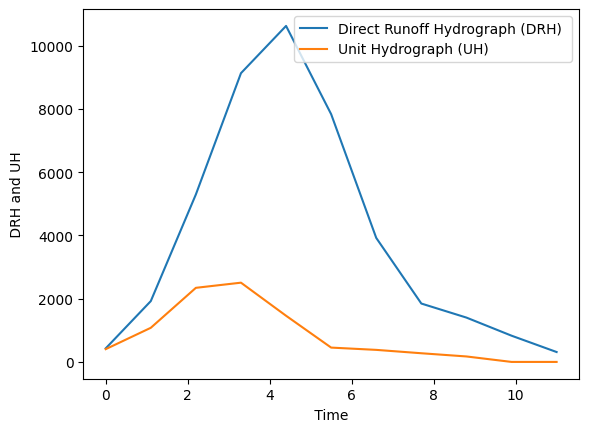

In [ ]:

UH1=np.zeros(N)
for i in range(0,K):
  UH1[i] = UH[i]

time = np.linspace (0,N,N)
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
plt.plot(time, Q, label='Direct Runoff Hydrograph (DRH) ')
plt.plot(time, UH1, label='Unit Hydrograph (UH)')
leg = ax.legend()
ax.set_xlabel(' Time ')
ax.set_ylabel (' DRH and UH ')
plt.show()

# Comparando as soluções do Exemplo 1 e 2

In [ ]:
solucao_substituicoes = [404, 1079, 2343, 2506, 1460, 453, 381, 274, 173]
solucao_substituicoes

[404, 1079, 2343, 2506, 1460, 453, 381, 274, 173]

In [ ]:
UH

array([ 403.85691971, 1078.90444553, 2343.01285101, 2505.91399715,
       1460.10115124,  453.08365463,  380.95686321,  274.18716607,
        172.91879362])

In [ ]:
tempo = np.arange(len(UH))
tempo

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

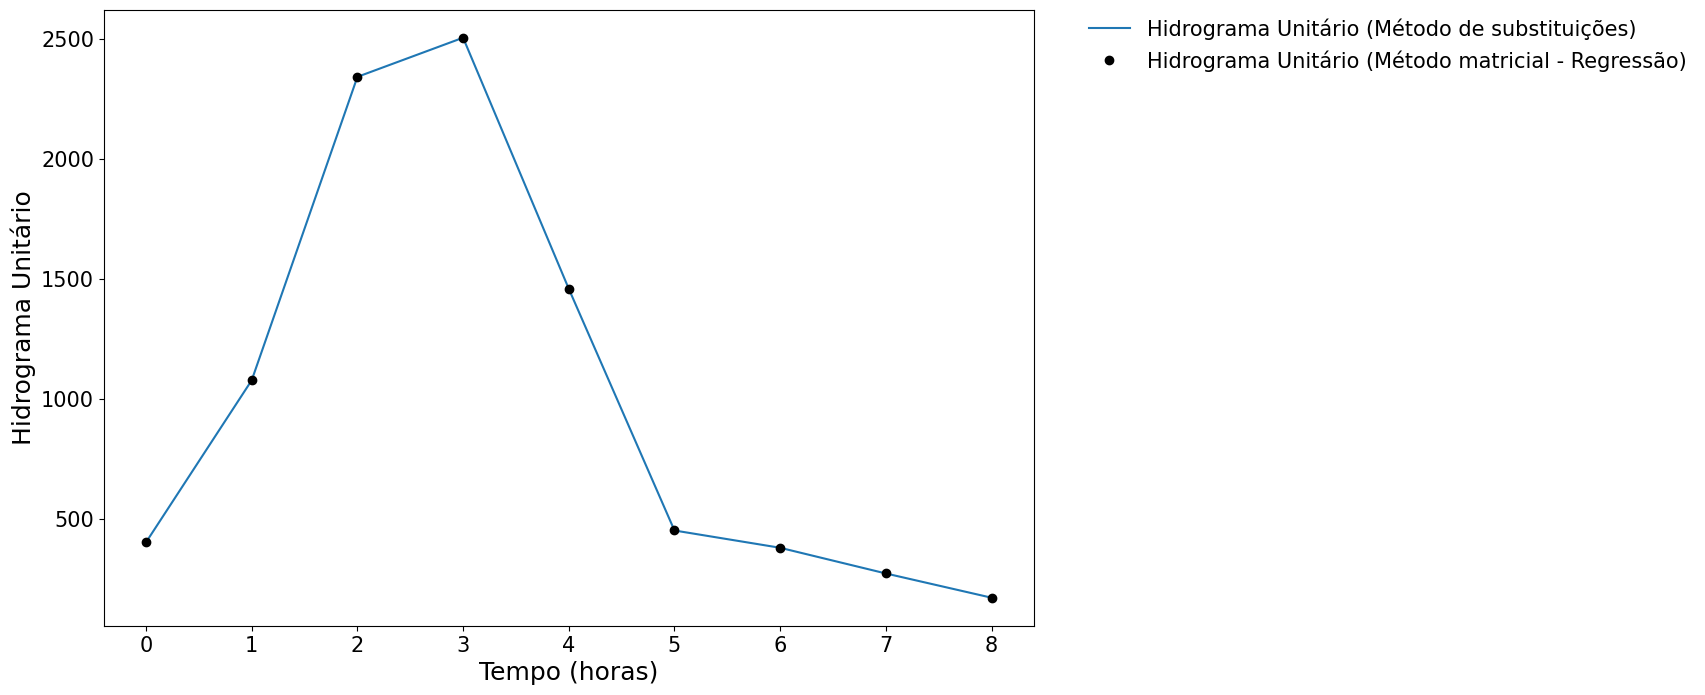

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(tempo, solucao_substituicoes, 'o-',linewidth=1.5,markersize = 0, label='Hidrograma Unitário (Método de substituições)')
plt.plot(tempo, UH, 'o-',linewidth=0, markersize = 6, color = 'black', label='Hidrograma Unitário (Método matricial - Regressão)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0.,frameon=False, fontsize=15)

plt.xlabel('Tempo (horas)', fontsize=18) #x label
plt.ylabel(r'Hidrograma Unitário', fontsize=18) #y label
plt.tick_params(axis='both', labelsize=15) #increase font size for ticks
plt.savefig('hidrograma_unitario.png', dpi = 300, bbox_inches='tight')
plt.show(); # still need this to show the plot